### Exercise 06 : Scatter Matrix
* create a dataframe where each user of the test group has the average difference,
number of pageviews and number of commits
* do not take project1 into account for calculations of the average difference and the
number of commits
* take the number of commits from the checker table

In [101]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

connection = sqlite3.connect("../data/checking-logs.sqlite")

In [102]:
query = """SELECT uid, COUNT(*) AS commits 
            FROM checker 
            WHERE uid LIKE 'user_%' 
            AND NOT labname = 'project1' 
            GROUP BY uid"""
commits = pd.io.sql.read_sql(query, connection)
commits

,uid,commits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [103]:
query = """SELECT uid, COUNT(*) AS views 
            FROM pageviews 
            WHERE uid LIKE 'user_%' 
            GROUP BY uid"""
views = pd.io.sql.read_sql(query, connection)
views

,uid,views
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [104]:
query = """SELECT cu.uid, AVG(d.delta) AS delta
                FROM(SELECT uid, COUNT(*) AS count FROM pageviews GROUP BY uid) AS cu
            JOIN (SELECT uid, CAST((julianday(t.first_commit_ts) - julianday(datetime((d.deadlines), "unixepoch"))) * 24 AS INTEGER) as delta
                FROM test t 
                JOIN deadlines d on t.labname = d.labs
                WHERE NOT t.labname = "project1") as d
            ON cu.uid = d.uid
            GROUP BY cu.uid, cu.count
            """
views_diff = pd.io.sql.read_sql(query, connection)
views_diff

,uid,delta
0,user_1,-64.400000
1,user_10,-74.800000
2,user_14,-159.000000
3,user_17,-61.600000
4,user_18,-5.666667
5,user_19,-98.750000
6,user_21,-95.500000
7,user_25,-92.600000
8,user_28,-86.400000
9,user_3,-105.400000


In [105]:
df = pd.merge(commits, views, on="uid", how="inner")
df = pd.merge(df, views_diff, on="uid", how="inner")
df.columns = ["uid", "num_commits", "pageviews", "avg_diff"]
df = df.reindex(columns=["uid","avg_diff", "pageviews", "num_commits",])
df

,uid,avg_diff,pageviews,num_commits
0,user_1,-64.400000,28,62
1,user_10,-74.800000,89,20
2,user_14,-159.000000,143,61
3,user_17,-61.600000,47,51
4,user_18,-5.666667,3,5
5,user_19,-98.750000,16,118
6,user_21,-95.500000,10,65
7,user_25,-92.600000,179,79
8,user_28,-86.400000,149,60
9,user_3,-105.400000,317,18


* the figsize is still the same, you can choose whatever fontsize you like as well as the
color palette
* the size of the dots should be 200
* the width of the lines of the diagonal graphs (kde) should be 3

array([[<Axes: xlabel='avg_diff', ylabel='avg_diff'>,
        <Axes: xlabel='pageviews', ylabel='avg_diff'>,
        <Axes: xlabel='num_commits', ylabel='avg_diff'>],
       [<Axes: xlabel='avg_diff', ylabel='pageviews'>,
        <Axes: xlabel='pageviews', ylabel='pageviews'>,
        <Axes: xlabel='num_commits', ylabel='pageviews'>],
       [<Axes: xlabel='avg_diff', ylabel='num_commits'>,
        <Axes: xlabel='pageviews', ylabel='num_commits'>,
        <Axes: xlabel='num_commits', ylabel='num_commits'>]], dtype=object)

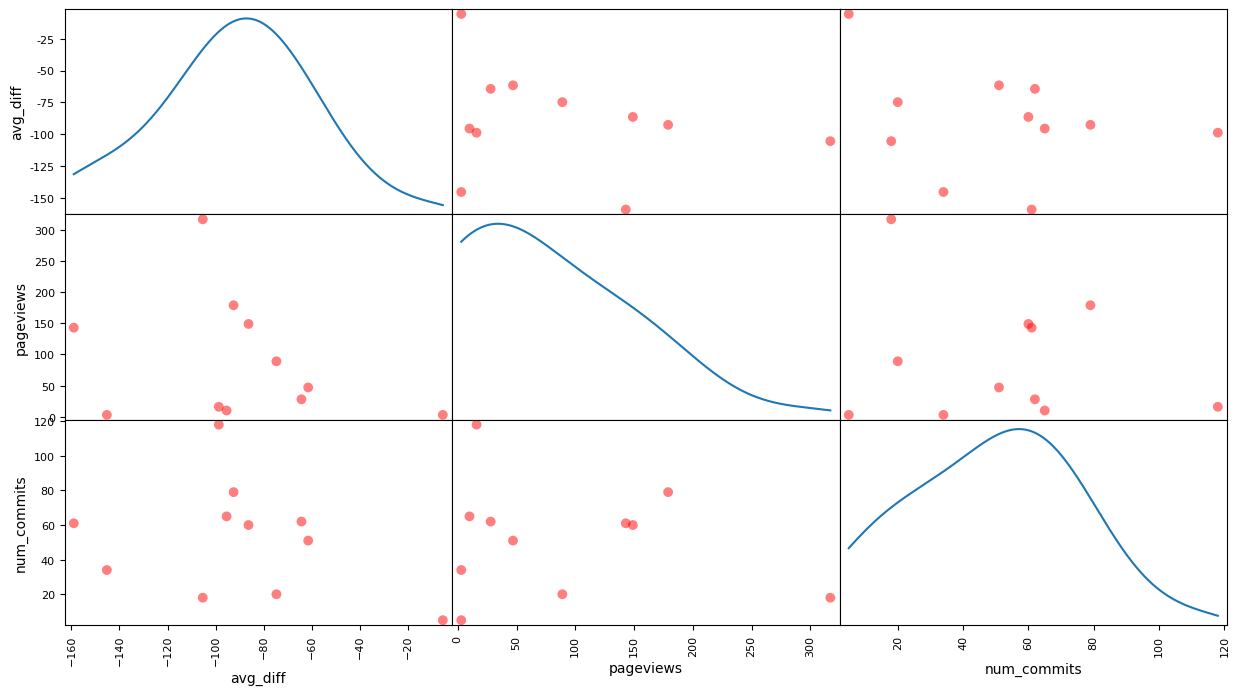

In [106]:
scatter_matrix(df, figsize=(15, 8), diagonal="kde", s=200, color="red")

* at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
  * “Can we say that if a user has a low number of pageviews then they likely
have a low number of commits?” The answer: yes or no. 
  * “Can we say that if a user has a low number of pageviews then they likely have
a small average difference between the first commit and the lab deadline?” The
answer: yes or no. 
  * “Can we say that there are many users with a low number of commits and a
few with a high number of commits”? The answer: yes or no. 
  * “Can we say that there are many users with a small average difference and a
few with a large average difference”? The answer: yes or no.

Can we say that if a user has a low number of pageviews then they likely
have a low number of commits?

Answer: no

Can we say that if a user has a low number of pageviews then they likely have
a small average difference between the first commit and the lab deadline?

Answer: no

Can we say that there are many users with a low number of commits and a
few with a high number of commits

Answer: yes

Can we say that there are many users with a small average difference and a
few with a large average difference

Answer: no

In [107]:
connection.close()